# Numerical Recipes Workshop 5

Week 25 Oct - 29 Oct 2021
**Please submit your notebook via Noteable by the Friday 6pm. 
 
**IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.

### Learning Objectives

* Generating random numbers
* Generating points from probability distributions
* Inverse CDF and rejection sampling methods
* Monte-Carlo derivation of uncertainties.
* Monte-Carlo integration

Please complete the workshop notebook before beginning on the checkpoint. **The workshop notebooks demonstrate everything you need to complete the checkpoints.**

The documentation relevant for the this workshop is here https://docs.scipy.org/doc/scipy/reference/optimize.html
Random numbers and stuff

Here we are going to create a random generator.

We are also going to use Python classes (https://docs.python.org/3/tutorial/classes.html ) for this. 

In python classes (or objects) are defined like that 

```
class MyClass:
    def __init__(self, a, b):
        """ Here we initialize the class """ 
        self.a = a
        self.b = b 
        ...
     
    def method1(self, a1, b1):
        """ Here we define method1 that takes two arguments
        ... 
      
    def method2(self, a2):
        """ Here we define method 2 that takes one argument """
        return self.a + a2
       
x = MyClass(2,3) # This will create initialize variable x as a class/object MyClass
x.method1(44,55) 
x.method2(3)
```
where `__init__` is a special method that describes how the object of the class will be initialized.
The point of classes is that they allow us to encapsulate the the state of objects and various methods 
that the object can provide.

Now let's create a random number generator class for the linear congruent random number generator.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here we create the class LCGenerator that will at every iteration
return the random number that is (ax+b) mod m where x is the previous number.

Make sure to replace the zersos by the values of a,b,m from the lecture.

In [33]:
class LCGenerator:
    def __init__(self, x0):
        self.a = 25214903917 # Fill me with the number from the lecture
        self.b = 11 # Fill me with the number from the lecture
        self.m = np.power(2,48) # Fill me with the number from the lecture
        self.x = x0
    def get_random_value(self):
        self.x = (self.a*self.x + self.b)%self.m
        return self.x
        
mygen = LCGenerator(333)
print (mygen.get_random_value())

8396563004372


In [35]:
mygen.get_random_value()

<ipython-input-33-3d7f8d65249c>:8: RuntimeWarning: overflow encountered in long_scalars
  self.x = (self.a*self.x + self.b)%self.m


164197594839214

Now lets verify that the generator returns uniform integer numbers up to m. 
Generate 100000 random numbers and make a histogram.

Use the same generator to generate 100000 uniformly distributed floating point values from 0 to 1. Make a histogram.

In [44]:
# YOUR CODE HERE
i = 0
r = []
for i in range(100000):
    mygen.get_random_value()
    i += 1
    r.append(mygen.get_random_value())
m = np.power(2,48)
x = r/m

<ipython-input-33-3d7f8d65249c>:8: RuntimeWarning: overflow encountered in long_scalars
  self.x = (self.a*self.x + self.b)%self.m


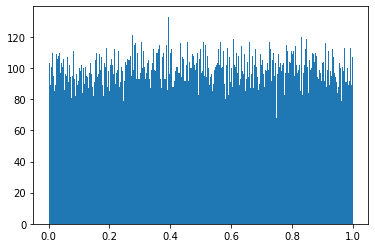

In [50]:
_ = plt.hist(x,bins=1000)

# Generating random numbers with numpy
The numpy random generation work in two different ways

* You can explicitely construct random state (random generator) and use it to generate random numbers, so you have full control over numbers (new interface)
* You can just use default methods of np.random.* which will initialize the internal generator from the system time. (old interface)

# New numpy random number generator interface

To use the interface you create the random number generator by 
using  ( see https://numpy.org/doc/stable/reference/random/generator.html ) 

```
rstate = np.random.default_rng(434343)
# or
rstate = np.random.default_rng()
```

If you don't specify the parameter for rng it means that the operating 
system random generator is used to initialize numpy random generator

Now this rstate can be used to generate integers(), uniformly distributed numbers, normally distributed numbers

## Challenge 
 
Use the rstate to 
* generate 10000 integers uniformly from 100 to 1000
* generate 10000 floating points from 0.2 to 0.3 
* generate 10000 floating points from the normal distribution with mean of 10 and stddev of 5

Verify the random numbers by plotting a histogram of each.

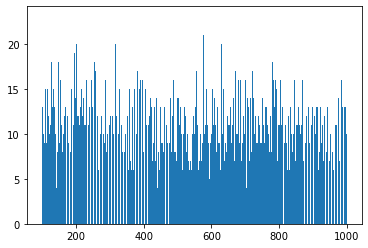

In [64]:
rstate  = np.random.default_rng(444)

# YOUR CODE HERE
rints = rstate.integers(low=100, high=1000, size=10000)
_ = plt.hist(rints,bins=1000)

In [57]:
b = 0.3
a = 0.2

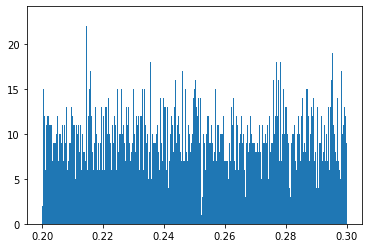

In [65]:
rfloats = (b - a) * rstate.random((10000,1)) + a
_ = plt.hist(rfloats,bins=1000)

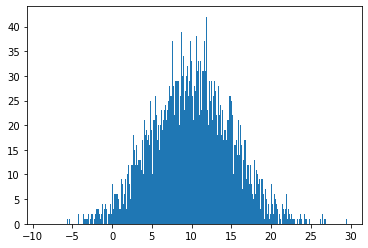

In [67]:
rnormal = rstate.normal(loc=10, scale=5, size=10000)
_ = plt.hist(rnormal,bins=1000)

# The impact of the random number generator initialization

Use the `np.random.default_rng` random generator

## Challenge

* Initialize the random generator with some number 
* Print a random integer from 0 to 1000 
* Re-Initialize the random generator again with the same number as before 
* Print a random integer from 0 to 1000 Is it the same number  ?
* What happen if you don't reinitialize the random generator ? 



In [76]:
# YOUR CODE HERE
rstate = np.random.default_rng(60)
rstate.integers(low=0, high=1000)

174

In [77]:
rstate = np.random.default_rng(60)
rstate.integers(low=0, high=1000)

174

In [78]:
rstate.integers(low=0, high=1000)

324

COMMENTS: if you reinitialize your rstate with the same seed, the first value it returns is always the same, hence the first two cells print the same values when ran once. When run again, without reinstating rstate and its seed, the number changes. The numbers are therefore psuedo random as they are the same sequence of numbers every time. 

# Old numpy random interface

In the old numpy.random interface (which is still often used) you just call `np.random.uniform`, `np.random.normal` and other `np.random.*` functions
You can also set up an initialization (seed) by using `np.random.seed(number)`

## Challenge 

Simulate the same set of random numbers as in previous exercise but using an old `np.random` interface
Check the how the histograms differ when you vary the seed.

In [95]:
#generate seed - global seed that talks to scipy
seed = np.random.seed(90)

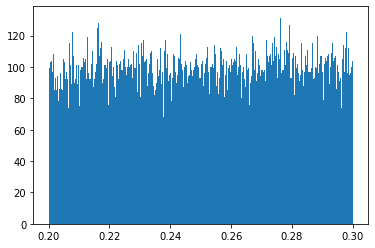

In [96]:
#generates floats
rfloats_old = np.random.uniform(low=0.2, high=0.3, size=100000)
_ = plt.hist(rfloats_old,bins=1000)

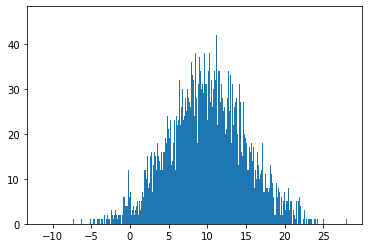

In [91]:
#generate normal dist
rnormal_old = np.random.normal(loc=10, scale=5, size=10000)
_ = plt.hist(rnormal_old,bins=1000)

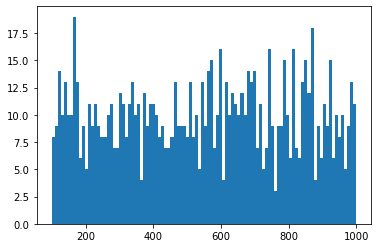

In [101]:
rint_old = np.random.randint(100, 1000,1000)
_ = plt.hist(rint_old,bins=100)

# Generating random numbers using the Inverse CDF method

Lets generate the probability distribution f(x) with the density that is 0 for x<0, 0.5 between 0<x<1 and is 0.5*exp(-(x-1)) for x>=1. This is uniform distribution glued with the exponential distribution

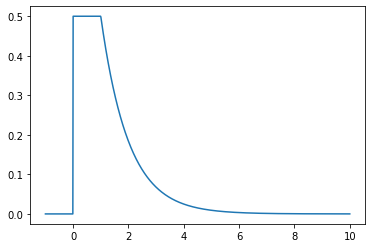

In [102]:
xgrid=np.linspace(-1,10,1000)

def fpdf(x):
    """ This the PDF of the distribution we are trying to simulate """
    return (( x<0).astype(int) * 0  +  
            ((x>=0) & (x<1)).astype(int) * 0.5 + 
            (x>=1).astype(int) * 0.5 * np.exp(-(x-1)))
plt.plot(xgrid,fpdf(xgrid))

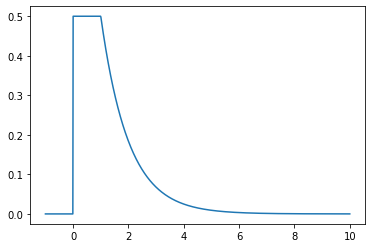

In [3]:
xgrid=np.linspace(-1,10,1000)

def fpdf(x):
    """ This the PDF of the distribution we are trying to simulate """
    return (( x<0).astype(int) * 0  +  
            ((x>=0) & (x<1)).astype(int) * 0.5 + 
            (x>=1).astype(int) * 0.5 * np.exp(-(x-1)))
plt.plot(xgrid,fpdf(xgrid))

Now Let's see what the CDF will be 

$$ F(x) = \int\limits_{-\infty}^{x} f(z) dz$$

$$F(x)= 0.5 x$$ for x<1 
and 
$$F(x)= 1- 0.5 \exp(1-x)$$ for x>1.

Now the 

## Challenge

Use the CDF (and it's inverse) to generate samples from the probability distribution f(x) defined above
using the inverse of F(x) that we just computed.
Verify that the distrubution is correct by making a histogram of the samples and overplotting the scaled PDF.

In [4]:
import scipy.optimize as scopt

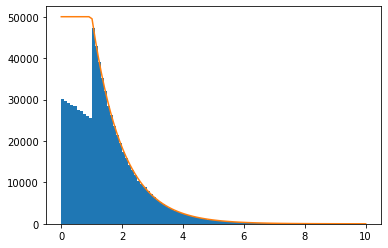

In [17]:
def sample_my(N):
# YOUR CODE HERE
    u = np.random.uniform(size=N)
    CDF_inv = (u<0.5).astype(float) * 2*u + (u>0.5).astype(int) * 1 - np.log(2*(1-u))
    return CDF_inv


plt.hist(sample_my(1000000),bins=100, range=[0,10]);
xgrid=np.linspace(0,10,100);
plt.plot(xgrid,fpdf(xgrid)*100000)

# scipy.stats.* and np.random generation of points from distributions


np.random.* offers an easy access samples from  large number of distributions https://numpy.org/doc/stable/reference/random/generator.html#distributions

with the typical interface 
`rstate.distribution_name(parameters, size=..)`

## Challenge
Explore some distributions like exponential,  lognormal, poisson and triangular from np.random.
Make histograms of samples from each of those.

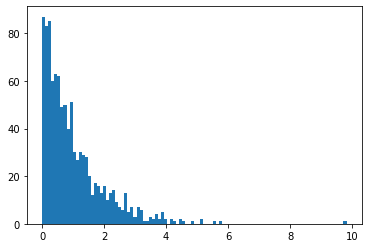

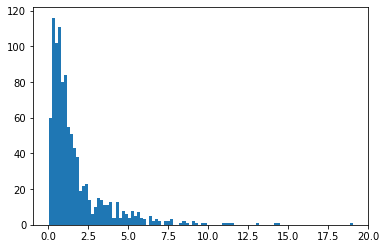

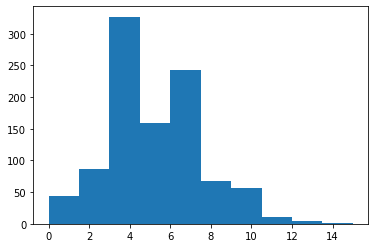

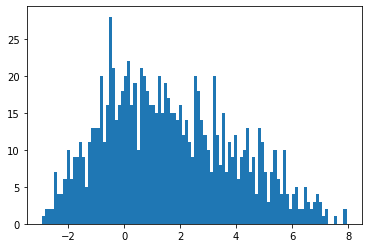

In [118]:
rng = np.random.default_rng()

plt.figure()
plt.hist(rng.exponential(size=1000),bins=100);

plt.figure()
plt.hist(rng.lognormal(mean=0.0, sigma=1.0, size=1000),bins=100);

plt.figure()
plt.hist(rng.poisson(lam=5, size=1000),bins=10);

plt.figure()
plt.hist(rng.triangular(-3, 0, 8, size=1000),bins=100);

# YOUR CODE HERE
#np.random.exponential

# scipy.stats distributions

scipy.stats (https://docs.scipy.org/doc/scipy/reference/stats.html) module allows you to create objects corresponding to specific distribution, and then use various methods to call the probability density function pdf(), cdf(), to sample numbers using rvs() command. See e.g. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm  

### Challenge

Create a scipy.stats object corresponding to a normal distribution with mean of 3 and standard deviation of 5.
Plot its PDF and CDF.

Sample 1000 points from that distrubution using that object. 

Repeat the same thing for the poisson distribution with rate of 1.5 (remember that Poisson distribution takes discrete values so it does not have a PDF but has a PMF)

In [21]:
import scipy.stats
from scipy.stats import norm, poisson, truncnorm

In [141]:
# YOUR CODE HERE
mean, var, skew, kurt = norm.stats(moments='mvsk')
rv = norm()
norm.pdf(x, loc=3, scale=5)
norm.cdf(x, loc=3, scale=5);

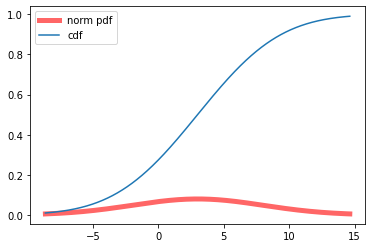

In [158]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01,loc=3, scale=5),
                norm.ppf(0.99,loc=3, scale=5), 1000)
ax.plot(x, norm.pdf(x,loc=3, scale=5),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, norm.cdf(x,loc=3, scale=5),label='cdf')
ax.legend()

(array([ 18.,  33.,  71., 145., 210., 211., 167.,  91.,  45.,   9.]),
 array([-11.19968101,  -8.38091632,  -5.56215163,  -2.74338693,
          0.07537776,   2.89414246,   5.71290715,   8.53167185,
         11.35043654,  14.16920124,  16.98796593]),
 <BarContainer object of 10 artists>)

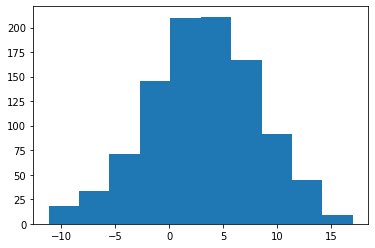

In [159]:
r = norm.rvs(loc=3, scale=5, size=1000)
plt.hist(r,bins=10)

In [162]:
mu = 1.5
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

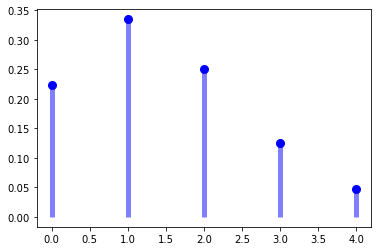

In [170]:
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.01,mu),poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

# Rejection sampling 

## Challenge

Use rejection sampling to sample from circular distribution distribution 

$$ f(x) = \frac{2}{\pi} \sqrt{1-x^2}$$ for -1<x<1,  and 0 for |x|>1

* Use Uniform distribution as a reference distribution g(x)
* Use Normal distribution as a reference distribution g(x)

You may need to empirically determine the factor M to ensure that f(x) < M * g(x) for all x.

Plot the samples and verify that they have the shape of f(x)

In [46]:
def pdf_target(x):
    return 2 / np.pi * np.sqrt(1-x**2)


def gen_circle(N):
    """
    Return the sample of points sampled from the 'circular distribution'
    """
    x = np.random.uniform(low=-1, high=1.0,size=N)
    y = np.random.uniform(low=0,high=pdf_target(0),size=N)
    x_sample = []
    i = 0
    while y[i] < pdf_target(x[i]):
        x_sample.append(x)
        i += 1
    return x_sample
    

x_sample = gen_circle(1000)

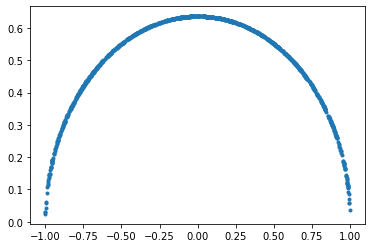

In [198]:
plt.plot(x_sample[0],pdf_target(x_sample[0]),'.')

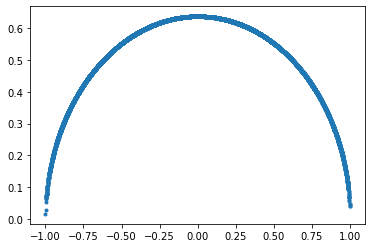

In [48]:
def gen_circle(N):
    lower, upper = -1, 1
    mu, sigma = 0, 1
    x = scipy.stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
    u1 = x.rvs(10000)
    x = scipy.stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
    u2 = x.rvs(10000)
    N = 1000
    M=0.3 #scale factor
    #need to randomly distribute
    idx,=np.where(u2<=pdf_target(u1)/M)
    v=u1[idx]
    return v
plt.plot(v,pdf_target(v),'.')

In [34]:
assert(len(gen_circle(10000))==10000)
assert(gen_circle(10000).min() > -1)
assert(gen_circle(10000).max() < 1)

AssertionError: 

# Monte-Carlo uncertainties

Monte-Carlo is a powerful way of estimating the uncertainties.
If we have a vector quantity x with the Gaussian uncertainty e and we want to estimate the uncertainty on y=F(x) where F() is some function the way to do that is to sample points x_i from the Normal distribution, evaluate y_i =F(x_i) and compute Sttdev[y] from these samples.


## Challenge 

You are measuring the properties of particles observed in a detector.
For each particle you observe a mass with the uncertainty, and 3 component velocity with uncertainties. 
You need to estimate the uncertianty on the kinetic energy of each particle
$$E=1/2 m  (V_x^2+ V_y^2 + V_z^2)$$

Verify that the uncertainty matches the analytic prediction of $\sigma_E = m \sqrt{ V_x^2 \sigma_{vx}^2 +  V_y^2 \sigma_{vy}^2 +  V_z^2 \sigma_{vz}^2 } $ when the uncertainty on the mass is negligible and uncertainties on individual velocities are small.
Verify that the uncertainty matches the analytic prediction of $\sigma_E = 0.5 *\sigma_m (V_x^2+V_y^2+V_z^2) $ when the uncertainty on the velocities is negligible and uncertainty on the mass is small.

In [18]:
def energy_uncertainty(m, e_m, vx, vy, vz, e_vx, e_vy, e_vz):
    # YOUR CODE HERE
    mass_norm = np.random.normal(loc = m, scale = e_m, size=10000)
    #print(mass_norm)
    vx_norm = np.random.normal(loc = vx, scale = e_vx, size=10000)
    vy_norm = np.random.normal(loc = vy, scale = e_vy, size=10000)
    vz_norm = np.random.normal(loc = vz, scale = e_vz, size=10000)
    
    kinenergy = []
    for i in range(10000):
        kinenergy.append(0.5 * mass_norm[i] * vx_norm[i]*vx_norm[i] * vy_norm[i]*vy_norm[i] * vz_norm[i]*vz_norm[i])
        
    #Mean value and stddev of the final distribution
    energy_uncertainty = np.std(kinenergy)
    return energy_uncertainty
        

    
    

        
        

m,em,vx,vy,vz,evx,evy,evz=1,0,1,2,3,0.01,0.01,0.01 #mass uncertainty negligible and velocity uncertainties are small
print (energy_uncertainty(m,em,vx,vy,vz,evx,evy,evz), m*np.sqrt(vx**2*evx**2+vy**2*evy**2+vz**2*evz**2))
m,em,vx,vy,vz,evx,evy,evz=1,0.1,1,2,3,0.0,0.0,0.0 #
print (energy_uncertainty(m,em,vx,vy,vz,evx,evy,evz), 0.5*em*(vx**2+vy**2+vz**2))

0.42542112384639613 0.03741657386773942
1.7889323224514992 0.7000000000000001


# Monte Carlo integration
We have to integrate the function in 3D space

$$ f(x,y,z) = \sqrt{1-x^2 -y^2 -z^2}$$ where $x^2+y^2+z^2<1$ and zero othewise

$$ I = \int f(x,y,z) dx dy dz$$
 
Do that calculation we need to represent the integral as an integral of the product of the function and the pdf. We can always do that by the following operation where g(x,y,z) is the PDF 

$$I = \int f(x,y,z) dx dy dz = \int \frac{f(x,y,z)}{g(x,y,z)} g(x,y,z) dx dy dz \approx \frac{1}{N}\sum_i \frac{f(x_i,y_i,z_i)}{g(x_i,y_i,z_i)} $$
where $x_i,y_i,z_i$ are samples from the probability distribution g(x,y,z)

# Challenge 

Evaluate the integral $I$ using g() that is 
* g(x,y,z)  the normal distribution in 3D space 
$P(x) = \frac{1}{(2 \pi)^{3/2}} \exp {\left( -\frac{1}{2} (x^2+ y^2+z^2)\right)}$
* and g(x,y,z) that corresponds to the the uniform distribution over a 3D cube -1<x<1 -1<y<1 -1<z<1

Start the integration with N=10000 

The true value of the integral is $\pi^2/4$

See how the result changes as you change the number of sampled points.

In [43]:
# YOUR CODE HERE
# limits of integration
N = 1000

x_min = -0.99
x_max = 0.99

y_min = -0.99
y_max = 0.99

z_min = -0.99
z_max = 0.99

ar = np.zeros(N)


Xrand = random.uniform(x_min,x_max,N)
Yrand = random.uniform(y_min,y_max,N)
Zrand = random.uniform(z_min,z_max,N)

for i in range(len(Xrand)):
    Xrand[i] = random.uniform(x_min,x_max)
for i in range(len(Yrand)):
    Yrand[i] = random.uniform(y_min,y_max)    
for i in range(len(Zrand)):
    Zrand[i] = random.uniform(z_min,z_max)  

integral = 0.0

# function to calculate 
def f(x,y,z):
	return np.sqrt(1 - x**2 - y**2 - z**2)

for i in range(N):
    if (f(Xrand[i],Yrand[i],Zrand[i]) < 1):
        integral += 1.0
    
ans=(x_max-x_min)*(y_max-y_min)*(z_max-z_min)
ans = VolumeBox*integral/float(N) 

# prints the solution
print ("The value calculated by monte carlo integration is {}.".format(ans))


The value calculated by monte carlo integration is 4.424.


<ipython-input-43-296223ce44e5>:36: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - x**2 - y**2 - z**2)


In [44]:
def monte_carlo(n):
    Xrand = random.uniform(x_min,x_max,N)
    Yrand = random.uniform(y_min,y_max,N)
    Zrand = random.uniform(z_min,z_max,N)
    for i in range(len(Xrand)):
        Xrand[i] = random.uniform(x_min,x_max)
    for i in range(len(Yrand)):
        Yrand[i] = random.uniform(y_min,y_max)    
    for i in range(len(Zrand)):
        Zrand[i] = random.uniform(z_min,z_max)
    g = np.random.normal(size=N)
    for i in range(N):
        f = np.sqrt(1 - Xrand[i]**2 - Yrand[i]**2 - Zrand[i]**2)
        I = 1/n * np.sum(f/g)
    return I

In [45]:
monte_carlo(100)

<ipython-input-44-5a228f534dc9>:13: RuntimeWarning: invalid value encountered in sqrt
  f = np.sqrt(1 - Xrand[i]**2 - Yrand[i]**2 - Zrand[i]**2)


29.910081629526786